In [ ]:
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
office_prod_reviews = pd.read_json('data/reviews_Office_Products_5.json',lines=True)

In [ ]:
office_prod_reviews.head()

In [ ]:
office_prod_reviews.overall.describe()

In [ ]:
#Get number of reviews by reviewers. We see Amazon Customer is a default username for reviewers with no name. 
num_reviews_by_user = office_prod_reviews[['reviewerName','asin']].groupby('reviewerName',as_index=False).agg('count')
num_reviews_by_user.sort_values('asin',ascending=False)

In [143]:
#Remove 'Amazon Customer' from the table
num_reviews_by_user = num_reviews_by_user[num_reviews_by_user.reviewerName != 'Amazon Customer']
num_reviews_by_user.sort_values('asin',ascending=False)

,reviewerName,asin
626,"C. Hill ""CFH""",93
4097,"Two kids mom ""scienceteachermom""",81
1213,Ed,78
481,"Bill Raley ""Vista Bill""",76
3021,Noname,76
2269,Kent J. Smythe,75
3029,Nuknuk,75
4700,"scesq ""scesq""",70
1044,"Dawn Dowdle ""Mystery reviewer""",70
3641,Scott,69


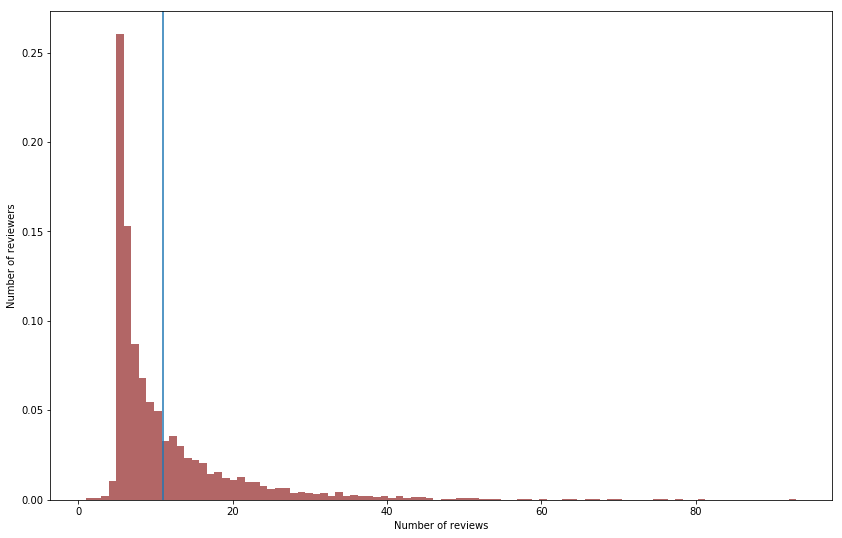

In [144]:
#Histogram of number of reviews written by users
x =num_reviews_by_user.asin
plt.figure(figsize=(14,9))
plt.hist(x, normed=True, faceColor ='maroon',bins=94,alpha=0.6)
plt.ylabel('Number of reviewers')
plt.xlabel('Number of reviews')
plt.axvline(np.mean(num_reviews_by_user.asin))

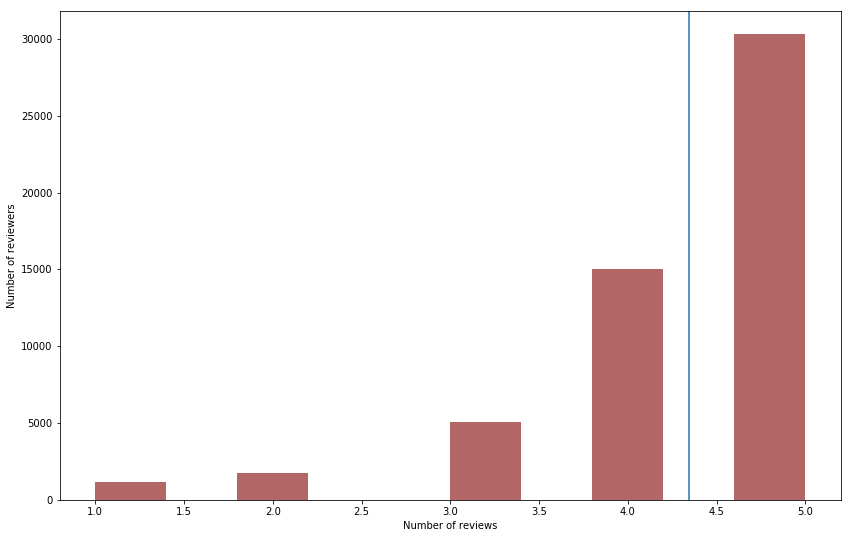

In [145]:
#Histogram of ratings
x = office_prod_reviews.overall
plt.figure(figsize=(14,9))
plt.hist(x, faceColor ='maroon',bins=10,alpha=0.6)
plt.ylabel('Number of reviewers')
plt.xlabel('Number of reviews')
plt.axvline(np.mean(office_prod_reviews.overall))

In [146]:
np.histogram(x)

(array([ 1130,     0,  1726,     0,     0,  5060,     0, 15015,     0, 30327]),
 array([ 1. ,  1.4,  1.8,  2.2,  2.6,  3. ,  3.4,  3.8,  4.2,  4.6,  5. ]))

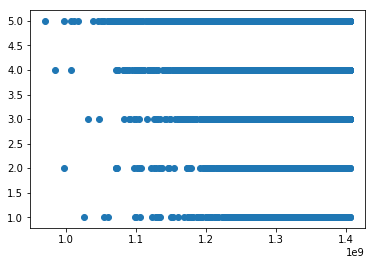

In [147]:
x = office_prod_reviews.unixReviewTime
y= office_prod_reviews.overall
plt.scatter(x,y)

In [148]:
office_prod_reviews.head()

,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime,upvotes,votes,helpfulness,count_words
0,B00000JBLH,"[3, 4]",5,"I bought my first HP12C in about 1984 or so, a...","09 3, 2004",A32T2H8150OJLU,ARH,"A solid performer, and long time friend",1094169600,3,4,0.000016,195
1,B00000JBLH,"[7, 9]",5,WHY THIS BELATED REVIEW? I feel very obliged t...,"12 15, 2007",A3MAFS04ZABRGO,"Let it Be ""Alan""","Price of GOLD is up, so don't bury the golden ...",1197676800,7,9,0.000038,934
2,B00000JBLH,"[3, 3]",2,I have an HP 48GX that has been kicking for mo...,"01 1, 2011",A1F1A0QQP2XVH5,Mark B,"Good functionality, but not durable like old HPs",1293840000,3,3,0.000016,96
3,B00000JBLH,"[7, 8]",5,I've started doing more finance stuff recently...,"04 19, 2006",A49R5DBXXQDE5,R. D Johnson,One of the last of an almost extinct species,1145404800,7,8,0.000038,645
4,B00000JBLH,"[0, 0]",5,For simple calculations and discounted cash fl...,"08 4, 2013",A2XRMQA6PJ5ZJ8,Roger J. Buffington,Still the best,1375574400,0,0,0.000000,125


In [149]:
office_prod_reviews['upvotes']=0
office_prod_reviews['votes']=0


In [150]:
for i in range(len(office_prod_reviews)):
    office_prod_reviews.ix[i,'upvotes'] = office_prod_reviews['helpful'][i][0]
    office_prod_reviews.ix[i,'votes'] = office_prod_reviews['helpful'][i][1]                                              
                                                              
    

In [151]:
office_prod_reviews.ix[0,'upvotes']=3 

In [152]:
office_prod_reviews.head()

,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime,upvotes,votes,helpfulness,count_words
0,B00000JBLH,"[3, 4]",5,"I bought my first HP12C in about 1984 or so, a...","09 3, 2004",A32T2H8150OJLU,ARH,"A solid performer, and long time friend",1094169600,3,4,0.000016,195
1,B00000JBLH,"[7, 9]",5,WHY THIS BELATED REVIEW? I feel very obliged t...,"12 15, 2007",A3MAFS04ZABRGO,"Let it Be ""Alan""","Price of GOLD is up, so don't bury the golden ...",1197676800,7,9,0.000038,934
2,B00000JBLH,"[3, 3]",2,I have an HP 48GX that has been kicking for mo...,"01 1, 2011",A1F1A0QQP2XVH5,Mark B,"Good functionality, but not durable like old HPs",1293840000,3,3,0.000016,96
3,B00000JBLH,"[7, 8]",5,I've started doing more finance stuff recently...,"04 19, 2006",A49R5DBXXQDE5,R. D Johnson,One of the last of an almost extinct species,1145404800,7,8,0.000038,645
4,B00000JBLH,"[0, 0]",5,For simple calculations and discounted cash fl...,"08 4, 2013",A2XRMQA6PJ5ZJ8,Roger J. Buffington,Still the best,1375574400,0,0,0.000000,125


In [153]:
total_num_votes = np.sum(office_prod_reviews.votes)

In [154]:
office_prod_reviews['helpfulness'] = office_prod_reviews['upvotes']/total_num_votes

In [155]:
office_prod_reviews.head()

,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime,upvotes,votes,helpfulness,count_words
0,B00000JBLH,"[3, 4]",5,"I bought my first HP12C in about 1984 or so, a...","09 3, 2004",A32T2H8150OJLU,ARH,"A solid performer, and long time friend",1094169600,3,4,0.000016,195
1,B00000JBLH,"[7, 9]",5,WHY THIS BELATED REVIEW? I feel very obliged t...,"12 15, 2007",A3MAFS04ZABRGO,"Let it Be ""Alan""","Price of GOLD is up, so don't bury the golden ...",1197676800,7,9,0.000038,934
2,B00000JBLH,"[3, 3]",2,I have an HP 48GX that has been kicking for mo...,"01 1, 2011",A1F1A0QQP2XVH5,Mark B,"Good functionality, but not durable like old HPs",1293840000,3,3,0.000016,96
3,B00000JBLH,"[7, 8]",5,I've started doing more finance stuff recently...,"04 19, 2006",A49R5DBXXQDE5,R. D Johnson,One of the last of an almost extinct species,1145404800,7,8,0.000038,645
4,B00000JBLH,"[0, 0]",5,For simple calculations and discounted cash fl...,"08 4, 2013",A2XRMQA6PJ5ZJ8,Roger J. Buffington,Still the best,1375574400,0,0,0.000000,125


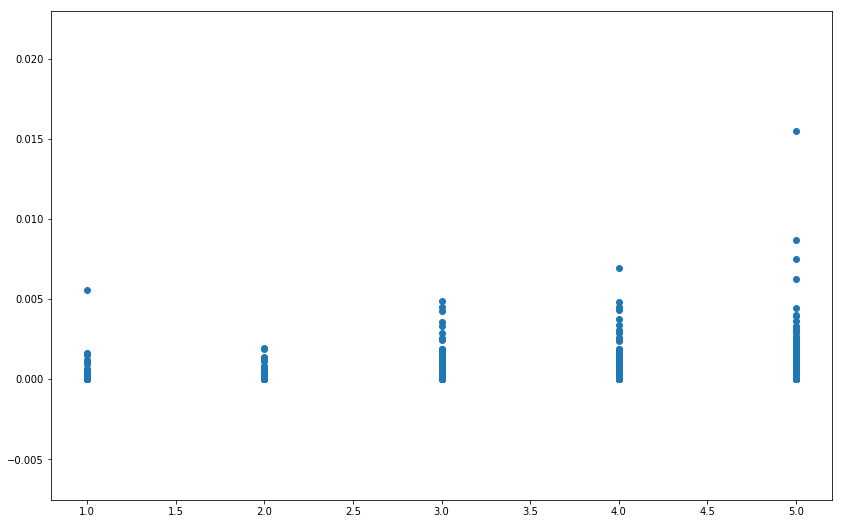

In [156]:
plt.figure(figsize=(14,9))
l = office_prod_reviews[office_prod_reviews.votes>0]
y = l.helpfulness
x= l.overall
plt.scatter(x,y)

In [157]:
import re
def count_words(line):
    return len(re.findall(r'\w+', str(line)))


In [158]:
for i in range(len(office_prod_reviews)):
    office_prod_reviews.ix[i,'count_words'] = count_words(office_prod_reviews['reviewText'][i])

In [159]:
office_prod_reviews.head()

,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime,upvotes,votes,helpfulness,count_words
0,B00000JBLH,"[3, 4]",5,"I bought my first HP12C in about 1984 or so, a...","09 3, 2004",A32T2H8150OJLU,ARH,"A solid performer, and long time friend",1094169600,3,4,0.000016,195
1,B00000JBLH,"[7, 9]",5,WHY THIS BELATED REVIEW? I feel very obliged t...,"12 15, 2007",A3MAFS04ZABRGO,"Let it Be ""Alan""","Price of GOLD is up, so don't bury the golden ...",1197676800,7,9,0.000038,934
2,B00000JBLH,"[3, 3]",2,I have an HP 48GX that has been kicking for mo...,"01 1, 2011",A1F1A0QQP2XVH5,Mark B,"Good functionality, but not durable like old HPs",1293840000,3,3,0.000016,96
3,B00000JBLH,"[7, 8]",5,I've started doing more finance stuff recently...,"04 19, 2006",A49R5DBXXQDE5,R. D Johnson,One of the last of an almost extinct species,1145404800,7,8,0.000038,645
4,B00000JBLH,"[0, 0]",5,For simple calculations and discounted cash fl...,"08 4, 2013",A2XRMQA6PJ5ZJ8,Roger J. Buffington,Still the best,1375574400,0,0,0.000000,125


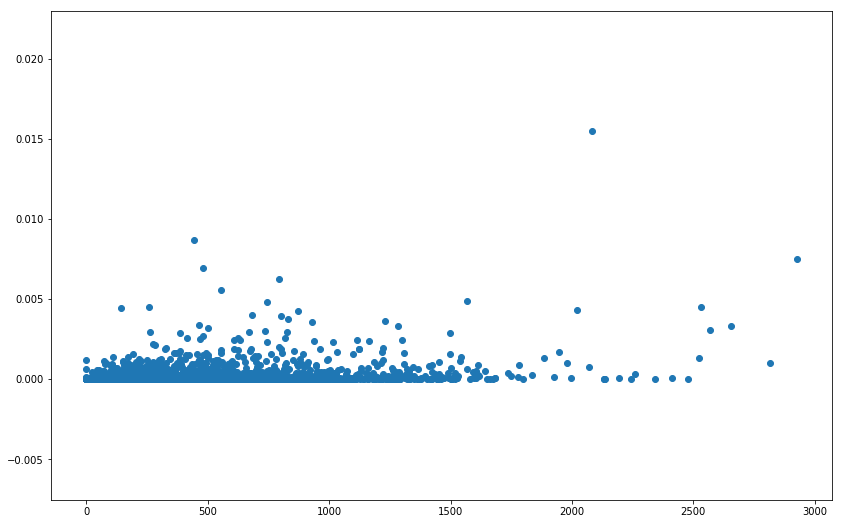

In [165]:
plt.figure(figsize=(14,9))
l = office_prod_reviews[(office_prod_reviews.votes>0) & (office_prod_reviews.count_words<3000)]
y = l.helpfulness
x= l.count_words
plt.scatter(x,y)

In [161]:
#max words in a review

office_prod_reviews.count_words.describe()

count    53258.000000
mean       151.325735
std        168.237737
min          0.000000
25%         57.000000
50%        105.000000
75%        185.000000
max       5745.000000
Name: count_words, dtype: float64